In [43]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
from progressbar import progressbar
savePNG = False ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pdf')

notebookPlotFlag = False ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
## original data with least_squares
tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])
print(fluxNorm)
#tess_2020bpi.head()
## Fausnaugh Updated Data with least_squares
tess_2020bpi_a = pd.read_csv('JhaData/TESS_SN2020bpi_updated.csv')
tess_2020bpi_a_norm = normLC(tess_2020bpi_a)

## Original Data with MCMC (only sector21)
tess_2020bpi_s21_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_MCMC.csv')
tess_2020bpi_s21_mcmc_norm = normLC(tess_2020bpi_s21_mcmc)

## Fausnaugh Updated Data with MCMC (only sector21)
tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)
# tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm.copy()
# tess_2020bpi_s21_a_mcmc_norm_smol['flux_roll'] = tess_2020bpi_s21_a_mcmc_norm_smol['flux'].rolling(24).median()
# tess_2020bpi_s21_a_mcmc_norm_smol = tess_2020bpi_s21_a_mcmc_norm_smol.query('flux_roll < 1')

##ZTF Data
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()
                        ]
ztf_2020bpi_norm = normLC(ztf_2020bpi)
display(tess_2020bpi_a_norm)
display(ztf_2020bpi_norm)

0.05428581325102484


,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_raw_flux,bkg_model_flux,flux,e_flux,mjd_0
0,1870.44408,58869.94408,-5339.0302,1368.8706,1472.5589,-0.564845,0.144820,0.008457,0.007401,0.138746,0.00000
1,1870.46491,58869.96491,-6841.1413,1375.3282,1472.5589,-0.723761,0.145503,0.008457,-0.144851,0.139401,0.02083
2,1870.48574,58869.98574,-2219.7583,1400.7610,1472.5589,-0.234840,0.148194,0.008457,0.323565,0.141979,0.04166
3,1870.50658,58870.00658,-10843.6913,1370.6601,1472.5589,-1.147213,0.145010,0.008457,-0.550542,0.138928,0.06250
4,1870.52741,58870.02741,-9069.4821,1365.9754,1472.5589,-0.959510,0.144514,0.008457,-0.370712,0.138453,0.08333
...,...,...,...,...,...,...,...,...,...,...,...
2402,1926.38043,58925.88043,-3943.5868,1104.1300,-114.3956,-0.417213,0.116812,-0.000657,0.919168,0.061012,55.93635
2403,1926.40126,58925.90126,-824.5015,1094.5396,-114.3956,-0.087228,0.115797,-0.000657,1.091523,0.060482,55.95718
2404,1926.42209,58925.92209,-4053.7044,1096.5736,-114.3956,-0.428863,0.116012,-0.000657,0.913083,0.060595,55.97801
2405,1926.44293,58925.94293,-4965.5355,1080.8779,-114.3956,-0.525331,0.114352,-0.000657,0.862697,0.059727,55.99885


,BTJD,mjd,magap,sig_magap,flux,e_flux,mjd_0,e_flux_tuple
0,1879.870567,58879.370567,19.729799,0.2218,0.262020,0.053900,9.426487,"(0.002628163767600394, 0.003223832161130714)"
1,1881.011065,58880.511065,19.959801,0.2436,0.211999,0.047965,10.566985,"(0.0023129338055085068, 0.0028946976073013723)"
2,1881.031343,58880.531343,19.473101,0.1538,0.331905,0.047173,10.587263,"(0.0023797689104727814, 0.002741920034638759)"
3,1881.843854,58881.343854,19.660400,0.2291,0.279315,0.059376,11.399774,"(0.0028844699689605166, 0.003562099310207071)"
4,1882.032546,58881.532546,19.363001,0.1425,0.367327,0.048349,11.588466,"(0.00245268546717093, 0.0027966740782900297)"
...,...,...,...,...,...,...,...,...
60,1913.956053,58913.456053,18.190201,0.0653,1.081866,0.065106,43.511973,"(0.0034281041616709904, 0.0036406087655060856)"
61,1914.886007,58914.386007,18.257299,0.0857,1.017030,0.080360,44.441927,"(0.004190341876202083, 0.004534500521767668)"
62,1914.914143,58914.414143,18.423201,0.0892,0.872918,0.071796,44.470064,"(0.003737510405839528, 0.004057536259113009)"
63,1915.890868,58915.390868,18.187401,0.0936,1.084659,0.093623,45.446788,"(0.004863463561853576, 0.005301340084218918)"


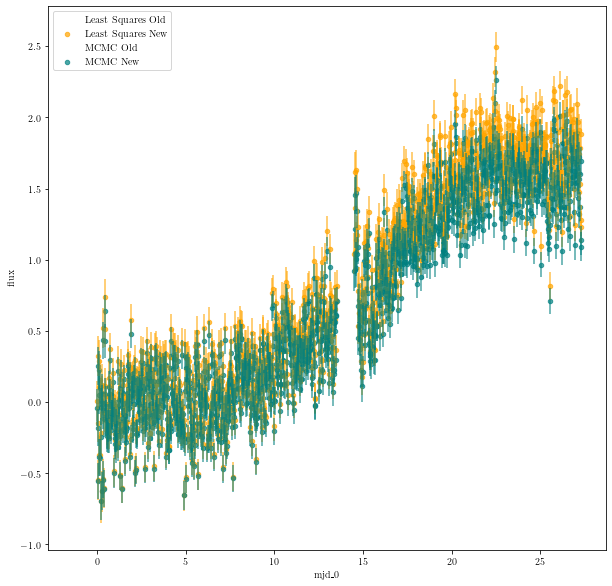

In [3]:
ax = tess_2020bpi_norm.plot('mjd_0','flux',yerr='e_flux',color='black',alpha=0.0,kind='scatter',figsize=(10,10),label='Least Squares Old')
tess_2020bpi_a_norm.plot('mjd_0','flux',yerr='e_flux',color='orange',alpha=0.7,kind='scatter',ax=ax,label='Least Squares New')
tess_2020bpi_s21_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='red',alpha=0.0,kind='scatter',ax=ax,label='MCMC Old')
tess_2020bpi_s21_a_mcmc_norm.plot('mjd_0','flux',yerr='e_flux',color='teal',alpha=0.7,kind='scatter',ax=ax,label='MCMC New')
ax.set_xlim(right=1.05*tess_2020bpi_s21_mcmc_norm['mjd_0'].max())
ax.set_xlabel(r'mjd\_0');


sampling...



done


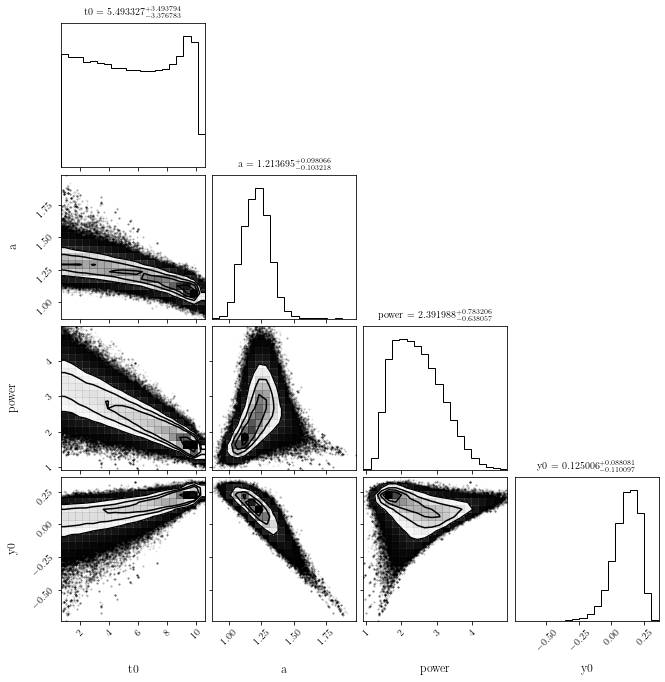

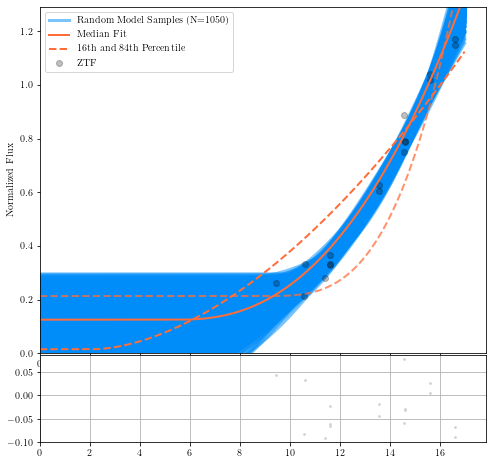

In [31]:
guess = {'t0':6, 'a':1,'power':2,'y0':0.02} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(ztf_2020bpi_norm, guess, scale, 
                            cutoff=17, nwalkers=50,nburn=100,nsteps=21000, dataType='ZTF',
                            curveModel='decoupled', savePlots=False,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

In [64]:
def modelResidual(data, params, percentiles,curveModel,
                  cutoff,debug=False,thinParams=1):
    '''
    Finds the residuals of the data for a given set of percentiles
    '''
    if debug:
        print('thinning Params to every '+str(thinParams)+'(th/rd) row')
        start = time.time()
        print('start first loop')
    ind=0
#     rssArray = []
    rssArray = [
        np.sum(np.square(np.array(data.raw_flux - lc_model(sample,params.columns,data,
                                                  curveModel=curveModel,
                                                  cutoff=cutoff)[0]))) 
        if curveModel =='dcRaw' else
        np.sum(np.square(np.array(data.flux - lc_model(sample,params.columns,data,
                                                  curveModel=curveModel,
                                                  cutoff=cutoff)[0]))) 
        for sample in params[::thinParams].to_numpy()
    ]
    
#     for sample in params.to_numpy():
#         model,var = lc_model(sample,params.columns,data,
#                              curveModel=curveModel,cutoff=cutoff)
#         if curveModel =='dcRaw':
#             residual = data.raw_flux - model
#         else:
#             residual = data.flux - model
#         rss = np.sum(np.square(residual))
#         rssArray.insert(ind,rss)
#         ind+=1
    if debug:
        end = time.time()
        print('first loop: '+str(end-start))
        start = time.time()
        print('start second loop')
#     ind=0
    pcntParams=[
        params[::thinParams].iloc[abs(rssArray-
                        np.quantile(rssArray,pcnt,
                                    interpolation='nearest')).argmin()].to_numpy()
        for pcnt in percentiles
    ]
#     for pcnt in percentiles:
#         pcntVal = np.quantile(rssArray,pcnt,interpolation='nearest')
#         pcnt_index = abs(rssArray-pcntVal).argmin()
#         pcntParams.insert(ind,params.iloc[pcnt_index].to_numpy())
#         ind+=1
    if debug:
        end = time.time()
        print('second loop: '+str(end-start))
    return pcntParams

In [5]:
guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
                            cutoff=16.75, nwalkers=50,nburn=10000,nsteps=210000,
                            curveModel='dcRaw', savePlots=True,plotExt='.pdf',
                            plotPal=('lightgrey','#008DF9','#FF6E3A'));

In [33]:
modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True)
## (No list Comp)

start first loop
first loop: 393.19773530960083
start second loop
second loop: 0.4174213409423828


[array([2.41131344, 1.28970774, 2.69457498, 0.00390966]),
 array([2.41131344, 1.28970774, 2.69457498, 0.00390966]),
 array([2.41131344, 1.28970774, 2.69457498, 0.00390966])]

In [39]:
modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True)
## (both List Comp, no Thin)

start first loop
first loop: 239.68545293807983
start second loop
second loop: 0.44800496101379395


[array([2.41131344, 1.28970774, 2.69457498, 0.00390966]),
 array([2.41131344, 1.28970774, 2.69457498, 0.00390966]),
 array([2.41131344, 1.28970774, 2.69457498, 0.00390966])]

In [65]:
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=1000))
print()
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=500))
print()
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=250))
print()
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=100))
print()
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=50))
print()
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=25))
print()
display(modelResidual(ztf_2020bpi_norm,fits,percentiles=[0.16,0.50,0.84],curveModel='decoupled',
              cutoff=17,debug=True,thinParams=10))

thinning Params to every 1000(th/rd) row
start first loop
first loop: 0.2429976463317871
start second loop
second loop: 0.0020012855529785156


[array([8.83040055, 1.08319924, 1.73557899, 0.19722076]),
 array([6.33781301, 1.20983281, 2.29193894, 0.10431659]),
 array([0.81213251, 1.34552802, 3.45866104, 0.02308122])]


thinning Params to every 500(th/rd) row
start first loop
first loop: 0.49399876594543457
start second loop
second loop: 0.0020008087158203125


[array([7.84116536, 1.13580371, 1.81721833, 0.1335615 ]),
 array([5.57858139, 1.26076229, 2.35113033, 0.08418316]),
 array([6.10070056, 1.20471381, 2.80516469, 0.19376098])]


thinning Params to every 250(th/rd) row
start first loop
first loop: 0.9760000705718994
start second loop
second loop: 0.002999544143676758


[array([ 5.54338035,  1.35099874,  1.91540568, -0.03600188]),
 array([2.86272577, 1.3301357 , 2.63896011, 0.02090892]),
 array([6.10070056, 1.20471381, 2.80516469, 0.19376098])]


thinning Params to every 100(th/rd) row
start first loop
first loop: 2.4250001907348633
start second loop
second loop: 0.004999637603759766


[array([ 1.33002025,  1.50656938,  2.23646021, -0.21547371]),
 array([4.15148124, 1.21306048, 2.57143203, 0.08920259]),
 array([1.53368759, 1.32616976, 3.37149287, 0.03620945])]


thinning Params to every 50(th/rd) row
start first loop
first loop: 4.857999324798584
start second loop
second loop: 0.007999897003173828


[array([9.67449821, 1.07510117, 1.63335347, 0.25347319]),
 array([ 0.72643857,  1.38310443,  2.85623171, -0.0636512 ]),
 array([3.76880495, 1.15142499, 3.19177756, 0.15382547])]


thinning Params to every 25(th/rd) row
start first loop
first loop: 9.547900438308716
start second loop
second loop: 0.0169985294342041


[array([8.44313548, 1.05680616, 1.79038233, 0.21039763]),
 array([2.41365253, 1.29451846, 2.72567911, 0.00443917]),
 array([1.66654592, 1.29986726, 3.37114272, 0.05287356])]


thinning Params to every 10(th/rd) row
start first loop
first loop: 23.732019662857056
start second loop
second loop: 0.044000864028930664


[array([3.45731678, 1.16337353, 2.26564849, 0.02710978]),
 array([5.87595194, 1.21175961, 2.36137804, 0.10800529]),
 array([6.1540025 , 1.24242221, 2.76164187, 0.1477137 ])]

In [61]:
fits[::3]

,t0,a,power,y0
0,2.411313,1.289708,2.694575,0.003910
3,2.411313,1.289708,2.694575,0.003910
6,2.362930,1.215629,2.800381,0.054247
9,2.955442,1.212014,2.958305,0.089894
12,2.955442,1.212014,2.958305,0.089894
...,...,...,...,...
1044987,8.827991,1.165061,1.949209,0.216756
1044990,9.009666,1.164211,1.938758,0.224330
1044993,9.698371,1.163754,1.785750,0.234912
1044996,9.726531,1.178899,1.815414,0.236459


In [7]:
# guess = {'t0':7, 'a':1,'power':2,'y0':-0.01,'std':3,'mean':11,'gFactor':0.2} 
# scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01,'std':0.2,'mean':0.2,'gFactor':0.07}
# fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
#                             cutoff=16.75, nwalkers=14,nburn=14000,nsteps=15000,
#                             curveModel='dcGauss', savePlots=False,plotExt='.pdf',
#                             plotPal=('lightgrey','#008DF9','#FF6E3A'));

In [8]:
# guess = {'t0':7, 'a':1,'power':2,'y0':-0.01} 
# scale = {'t0':0.2, 'a':0.1,'power':0.1,'y0':0.01}
# fits, model= hammerTime(tess_2020bpi_s21_a_mcmc_norm, guess, scale, 
#                             cutoff=16.75, nwalkers=100,nburn=50000,nsteps=100000,
#                             curveModel='decoupled', savePlots=True,plotExt='.pdf',
#                             plotPal=('lightgrey','#008DF9','#FF6E3A'));